# 用SVM 算法处理线性不可分的数据

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [3]:
X, y = datasets.make_moons()

In [4]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

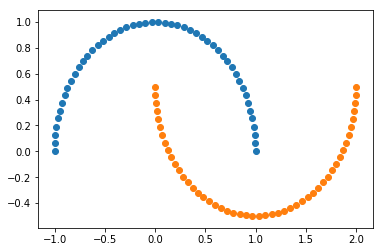

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

实际中，数据不可能这么规范，所以，需要加上一点噪音，通过阅读官方文档，执行下边语句

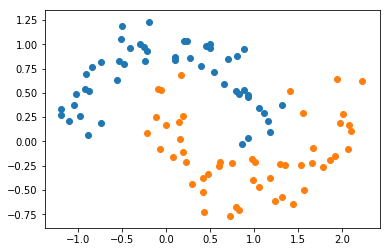

In [10]:
X, y = datasets.make_moons(noise=0.15, random_state= 666)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

现在的数据是不是 很接近 实际中的数据了，混乱无序中又透露出一点规律

将数据标准化

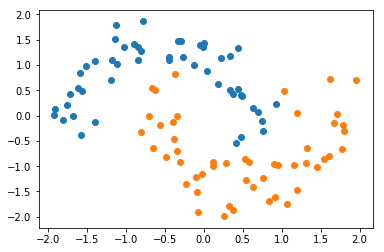

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
stand_X = scaler.transform(X)

plt.scatter(stand_X[y == 0, 0], stand_X[y == 0, 1])
plt.scatter(stand_X[y == 1, 0], stand_X[y == 1, 1])
plt.show()

# 使用多项式特征的SVM （决策边界不是一条直线）

由于其不是线性可分的，所以，按照以前的方式，我们需要在现有的特征上边加上一些高阶的特征，用到pipline函数   
(1) 将数据标准化   
（2）加高阶特征   
（3）放入pipline 用linearSVC函数进行分类

In [13]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def polynomial_SVC(degree, C):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("svc", LinearSVC(C = C))
        ])



In [14]:
poly_SVC = polynomial_SVC(degree = 3, C = 1.0)
poly_SVC.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

绘制决策边界

In [20]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


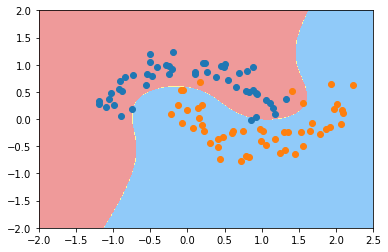

In [25]:
 # note: axis 要以标准化以后的数据来看，而不能以原有的数据来看
plot_decision_boundary(poly_SVC, axis = [-2, 2.5, -2.0, 2]) 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# SVM 可以先对数据转换成高维的,有多项式特征的数据,再调用SVC 函数进行分类

In [27]:
from sklearn.svm import SVC
def polynomial_kernelSVC(degree, C=1.0):
    return Pipeline([("std_scaler", StandardScaler()),
                     ("svc", SVC(kernel='poly', degree=degree, C=C))
    ])

poly_kernelSVC = polynomial_kernelSVC(degree = 3)
poly_kernelSVC.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

绘制决策边界

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


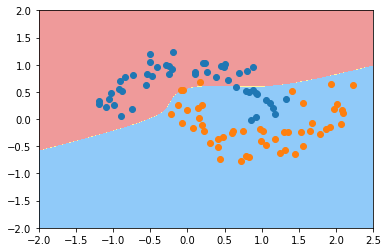

In [30]:
plot_decision_boundary(poly_kernelSVC, axis = [-2, 2.5, -2, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()